# Part I - Data Analysis of Flight Data 2007-08
## by Dasaprakash

## Introduction
> This data set includes information about flight details **for the year of 2008**. The details are split into three datasets: plane data, airports, carriers and trip details.

* 


## Preliminary Wrangling

### Carriers Data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import StrMethodFormatter

%matplotlib inline

In [2]:
df_carriers = pd.read_csv('carriers.csv')
df_carriers.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [3]:
df_carriers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         1490 non-null   object
 1   Description  1491 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


In [4]:
df_carriers.describe()

,Code,Description
count,1490,1491
unique,1490,1491
top,02Q,Titan Airways
freq,1,1


In [5]:
df_carriers.isna().sum()

Code           1
Description    0
dtype: int64

In [6]:
df_carriers.duplicated().sum()

0

### Plane Data

In [7]:
df_plane_data = pd.read_csv('plane-data.csv')
df_plane_data.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_plane_data.describe()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
count,5029,4480,4480,4480,4480,4480,4480,4480,4480
unique,5029,5,39,2413,167,2,4,7,52
top,N050AA,Corporation,BOEING,12/22/1986,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2001
freq,1,4440,2061,33,403,4479,4440,2883,389


In [9]:
df_plane_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tailnum        5029 non-null   object
 1   type           4480 non-null   object
 2   manufacturer   4480 non-null   object
 3   issue_date     4480 non-null   object
 4   model          4480 non-null   object
 5   status         4480 non-null   object
 6   aircraft_type  4480 non-null   object
 7   engine_type    4480 non-null   object
 8   year           4480 non-null   object
dtypes: object(9)
memory usage: 353.7+ KB


In [10]:
df_plane_data.isna().sum()

tailnum            0
type             549
manufacturer     549
issue_date       549
model            549
status           549
aircraft_type    549
engine_type      549
year             549
dtype: int64

In [11]:
df_plane_data.duplicated().sum()

0

### Airports

In [12]:
df_airports = pd.read_csv('airports.csv')
df_airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [13]:
df_airports.describe(include='all')

,iata,airport,city,state,country,lat,long
count,3376,3376,3364,3364,3376,3376.000000,3376.000000
unique,3376,3245,2675,56,5,NaN,NaN
top,00M,Municipal,Greenville,AK,USA,NaN,NaN
freq,1,5,11,263,3372,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,40.036524,-98.621205
std,NaN,NaN,NaN,NaN,NaN,8.329559,22.869458
min,NaN,NaN,NaN,NaN,NaN,7.367222,-176.646031
25%,NaN,NaN,NaN,NaN,NaN,34.688427,-108.761121
50%,NaN,NaN,NaN,NaN,NaN,39.434449,-93.599425
75%,NaN,NaN,NaN,NaN,NaN,43.372612,-84.137519


In [14]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   iata     3376 non-null   object 
 1   airport  3376 non-null   object 
 2   city     3364 non-null   object 
 3   state    3364 non-null   object 
 4   country  3376 non-null   object 
 5   lat      3376 non-null   float64
 6   long     3376 non-null   float64
dtypes: float64(2), object(5)
memory usage: 184.8+ KB


In [15]:
df_airports.isna().sum()

iata        0
airport     0
city       12
state      12
country     0
lat         0
long        0
dtype: int64

In [16]:
df_airports.duplicated().sum()

0

### Data of 2008

In [17]:
df_2008 = pd.read_csv('2008.csv')
df_2008.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [18]:
df_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [19]:
df_2008.describe(include='all')

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,2389217.0,2.389217e+06,2.389217e+06,2.389217e+06,2.324775e+06,2.389217e+06,2.319121e+06,2.389217e+06,2389217,2.389217e+06,...,2.319121e+06,2.324775e+06,2.389217e+06,64442,2.389217e+06,584583.000000,584583.000000,584583.000000,584583.000000,584583.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,...,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,NaN,...,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398966,NaN,...,NaN,NaN,NaN,26075,NaN,NaN,NaN,NaN,NaN,NaN
mean,2008.0,2.505009e+00,1.566386e+01,3.909625e+00,1.340018e+03,1.329992e+03,1.485835e+03,1.496744e+03,NaN,2.213888e+03,...,6.839862e+00,1.668584e+01,2.697202e-02,NaN,2.366466e-03,15.752957,2.938243,16.158462,0.080459,20.976710
std,0.0,1.121493e+00,8.750405e+00,1.980431e+00,4.802717e+02,4.657833e+02,5.081295e+02,4.845238e+02,NaN,1.951392e+03,...,4.846435e+00,1.102905e+01,1.620017e-01,NaN,4.858875e-02,40.035487,19.166662,30.534167,1.742579,38.617154
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.270000e+02,1.110000e+03,1.115000e+03,NaN,6.050000e+02,...,4.000000e+00,1.000000e+01,0.000000e+00,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,3.000000e+00,1.600000e+01,4.000000e+00,1.330000e+03,1.325000e+03,1.516000e+03,1.520000e+03,NaN,1.544000e+03,...,6.000000e+00,1.400000e+01,0.000000e+00,NaN,0.000000e+00,0.000000,0.000000,5.000000,0.000000,0.000000
75%,2008.0,4.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.914000e+03,1.910000e+03,NaN,3.631000e+03,...,8.000000e+00,1.900000e+01,0.000000e+00,NaN,0.000000e+00,16.000000,0.000000,20.000000,0.000000,27.000000


In [20]:
df_2008.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                64442
CRSDepTime                 0
ArrTime                70096
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                42452
ActualElapsedTime      70096
CRSElapsedTime           407
AirTime                70096
ArrDelay               70096
DepDelay               64442
Origin                     0
Dest                       0
Distance                   0
TaxiIn                 70096
TaxiOut                64442
Cancelled                  0
CancellationCode     2324775
Diverted                   0
CarrierDelay         1804634
WeatherDelay         1804634
NASDelay             1804634
SecurityDelay        1804634
LateAircraftDelay    1804634
dtype: int64

## Data Wrangling

### Observations:

* Remove irrelevant columns
* Handle null values for DepTime, ArrTime, AirTime, ArrDelay, DepDelay, TaxiIn, TaxiOut
* Merge df_2008 with flights, airports, carriers and plane_data

### Define

Remove irrelevant columns

### Code

In [21]:
df_2008.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [58]:
columns = ['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted']
df_clean = df_2008[columns]

### Test

In [59]:
df_clean.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1,3,4,1343.0,1325,1451.0,1435,WN,588,N240WN,...,55.0,16.0,18.0,HOU,LIT,393,4.0,9.0,0,0
1,1,3,4,1125.0,1120,1247.0,1245,WN,1343,N523SW,...,71.0,2.0,5.0,HOU,MAF,441,3.0,8.0,0,0
2,1,3,4,2009.0,2015,2136.0,2140,WN,3841,N280WN,...,71.0,-4.0,-6.0,HOU,MAF,441,2.0,14.0,0,0
3,1,3,4,903.0,855,1203.0,1205,WN,3,N308SA,...,108.0,-2.0,8.0,HOU,MCO,848,5.0,7.0,0,0
4,1,3,4,1423.0,1400,1726.0,1710,WN,25,N462WN,...,107.0,16.0,23.0,HOU,MCO,848,6.0,10.0,0,0


In [60]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   CRSDepTime         int64  
 5   ArrTime            float64
 6   CRSArrTime         int64  
 7   UniqueCarrier      object 
 8   FlightNum          int64  
 9   TailNum            object 
 10  ActualElapsedTime  float64
 11  CRSElapsedTime     float64
 12  AirTime            float64
 13  ArrDelay           float64
 14  DepDelay           float64
 15  Origin             object 
 16  Dest               object 
 17  Distance           int64  
 18  TaxiIn             float64
 19  TaxiOut            float64
 20  Cancelled          int64  
 21  Diverted           int64  
dtypes: float64(9), int64(9), object(4)
memory usage: 401.0+ MB


### Define

* Remove null values which are caused by cancelled flights and diverted flights. 

### Code

In [61]:
df_clean.Cancelled.value_counts()

0    2324775
1      64442
Name: Cancelled, dtype: int64

* Let's have only flight data which are not cancelled to check for the delays. Dropping cancelled flights.

In [62]:
df_clean = df_clean[df_clean.Cancelled == 0]

In [63]:
df_clean = df_clean.drop(['Cancelled'], axis=1)

In [64]:
df_clean.Diverted.value_counts()

0    2319121
1       5654
Name: Diverted, dtype: int64

In [65]:
df_clean = df_clean[df_clean.Diverted == 0]

In [66]:
df_clean = df_clean.drop(['Diverted'], axis=1)

### Test

In [67]:
df_clean.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              2
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
dtype: int64

In [68]:
df_clean.shape

(2319121, 20)

### Define

* Merge with other data like plane data, carriers and airports

In [69]:
df_clean = pd.merge(df_clean, df_plane_data[['tailnum', 'manufacturer', 'aircraft_type', 'engine_type']], how='inner', left_on='TailNum', right_on='tailnum')
df_clean.drop(['TailNum', 'tailnum'], axis=1, inplace=True)
df_clean.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,manufacturer,aircraft_type,engine_type
0,1,3,4,1343.0,1325,1451.0,1435,WN,588,68.0,...,16.0,18.0,HOU,LIT,393,4.0,9.0,BOEING,Fixed Wing Multi-Engine,Turbo-Fan
1,1,3,4,1758.0,1800,1854.0,1900,WN,41,56.0,...,-6.0,-2.0,HOU,MSY,303,3.0,8.0,BOEING,Fixed Wing Multi-Engine,Turbo-Fan
2,1,3,4,1516.0,1500,1614.0,1605,WN,41,58.0,...,9.0,16.0,LIT,DAL,296,3.0,6.0,BOEING,Fixed Wing Multi-Engine,Turbo-Fan
3,1,3,4,1921.0,1920,2017.0,2035,WN,41,56.0,...,-18.0,1.0,MSY,BHM,321,2.0,8.0,BOEING,Fixed Wing Multi-Engine,Turbo-Fan
4,1,3,4,617.0,615,743.0,740,WN,588,86.0,...,3.0,2.0,OAK,SAN,446,2.0,16.0,BOEING,Fixed Wing Multi-Engine,Turbo-Fan


In [70]:
df_clean = pd.merge(df_clean, df_carriers, left_on='UniqueCarrier', right_on='Code', how='inner')
df_clean = df_clean.rename(columns={'Description':'airline'})

In [71]:
df_clean.drop(['UniqueCarrier', 'Code'], axis=1, inplace=True)
df_clean.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,manufacturer,aircraft_type,engine_type,airline
0,1,3,4,1343.0,1325,1451.0,1435,588,68.0,70.0,...,18.0,HOU,LIT,393,4.0,9.0,BOEING,Fixed Wing Multi-Engine,Turbo-Fan,Southwest Airlines Co.
1,1,3,4,1758.0,1800,1854.0,1900,41,56.0,60.0,...,-2.0,HOU,MSY,303,3.0,8.0,BOEING,Fixed Wing Multi-Engine,Turbo-Fan,Southwest Airlines Co.
2,1,3,4,1516.0,1500,1614.0,1605,41,58.0,65.0,...,16.0,LIT,DAL,296,3.0,6.0,BOEING,Fixed Wing Multi-Engine,Turbo-Fan,Southwest Airlines Co.
3,1,3,4,1921.0,1920,2017.0,2035,41,56.0,75.0,...,1.0,MSY,BHM,321,2.0,8.0,BOEING,Fixed Wing Multi-Engine,Turbo-Fan,Southwest Airlines Co.
4,1,3,4,617.0,615,743.0,740,588,86.0,85.0,...,2.0,OAK,SAN,446,2.0,16.0,BOEING,Fixed Wing Multi-Engine,Turbo-Fan,Southwest Airlines Co.


In [72]:
df_clean = pd.merge(df_clean, df_airports[['iata', 'airport', 'city', 'state']], left_on='Origin', right_on='iata', how='inner')
df_clean = df_clean.rename(columns={'airport':'origin_airport', 'city':'origin_city', 'state':'origin_state'})
df_clean.drop(['Origin', 'iata'], axis=1, inplace=True)
df_clean.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Distance,TaxiIn,TaxiOut,manufacturer,aircraft_type,engine_type,airline,origin_airport,origin_city,origin_state
0,1,3,4,1343.0,1325,1451.0,1435,588,68.0,70.0,...,393,4.0,9.0,BOEING,Fixed Wing Multi-Engine,Turbo-Fan,Southwest Airlines Co.,William P Hobby,Houston,TX
1,1,3,4,1758.0,1800,1854.0,1900,41,56.0,60.0,...,303,3.0,8.0,BOEING,Fixed Wing Multi-Engine,Turbo-Fan,Southwest Airlines Co.,William P Hobby,Houston,TX
2,1,12,6,1121.0,1125,1212.0,1220,2211,51.0,55.0,...,192,3.0,9.0,BOEING,Fixed Wing Multi-Engine,Turbo-Fan,Southwest Airlines Co.,William P Hobby,Houston,TX
3,1,18,5,635.0,635,840.0,900,3927,125.0,145.0,...,937,4.0,10.0,BOEING,Fixed Wing Multi-Engine,Turbo-Fan,Southwest Airlines Co.,William P Hobby,Houston,TX
4,1,23,3,1045.0,950,1250.0,1205,272,245.0,255.0,...,1642,6.0,9.0,BOEING,Fixed Wing Multi-Engine,Turbo-Fan,Southwest Airlines Co.,William P Hobby,Houston,TX


In [73]:
df_clean = pd.merge(df_clean, df_airports[['iata', 'airport', 'city', 'state']], left_on='Dest', right_on='iata', how='inner')
df_clean = df_clean.rename(columns={'airport':'dest_airport', 'city':'dest_city', 'state':'dest_state'})
df_clean.drop(['Dest', 'iata'], axis=1, inplace=True)
df_clean.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,manufacturer,aircraft_type,engine_type,airline,origin_airport,origin_city,origin_state,dest_airport,dest_city,dest_state
0,1,3,4,1343.0,1325,1451.0,1435,588,68.0,70.0,...,BOEING,Fixed Wing Multi-Engine,Turbo-Fan,Southwest Airlines Co.,William P Hobby,Houston,TX,Adams,Little Rock,AR
1,1,21,1,1905.0,1840,2030.0,1950,1561,85.0,70.0,...,BOEING,Fixed Wing Multi-Engine,Turbo-Fan,Southwest Airlines Co.,William P Hobby,Houston,TX,Adams,Little Rock,AR
2,3,2,7,1850.0,1840,1956.0,1950,1561,66.0,70.0,...,BOEING,Fixed Wing Multi-Engine,Turbo-Fan,Southwest Airlines Co.,William P Hobby,Houston,TX,Adams,Little Rock,AR
3,4,26,6,1857.0,1900,2002.0,2010,3269,65.0,70.0,...,BOEING,Fixed Wing Multi-Engine,Turbo-Jet,Southwest Airlines Co.,William P Hobby,Houston,TX,Adams,Little Rock,AR
4,2,7,4,1923.0,1840,2036.0,1950,1561,73.0,70.0,...,BOEING,Fixed Wing Multi-Engine,Turbo-Fan,Southwest Airlines Co.,William P Hobby,Houston,TX,Adams,Little Rock,AR


### Test

In [74]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235032 entries, 0 to 2235031
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   CRSDepTime         int64  
 5   ArrTime            float64
 6   CRSArrTime         int64  
 7   FlightNum          int64  
 8   ActualElapsedTime  float64
 9   CRSElapsedTime     float64
 10  AirTime            float64
 11  ArrDelay           float64
 12  DepDelay           float64
 13  Distance           int64  
 14  TaxiIn             float64
 15  TaxiOut            float64
 16  manufacturer       object 
 17  aircraft_type      object 
 18  engine_type        object 
 19  airline            object 
 20  origin_airport     object 
 21  origin_city        object 
 22  origin_state       object 
 23  dest_airport       object 
 24  dest_city          object 
 25  dest_state        

In [75]:
df_clean.shape

(2235032, 26)

### Structure of dataset?

> The dataset has 2235032 flight trips with 27 features

### Main feature(s) of interest in the dataset?

> The main features are ArrDelay, DepDelay

### Features in the dataset that will help support investigation

> The supporting features are date/time features, Carrier/Fligt info, origin and destination

## Univariate Exploration

> **Question: What is the distribution of flight trips by month?**

> **Visualization:**

In [76]:
df_month = df_clean.Month.value_counts().reset_index()
df_month.columns = ['Month', 'Count']
df_month

,Month,Count
0,3,577030
1,1,565449
2,4,565327
3,2,527226


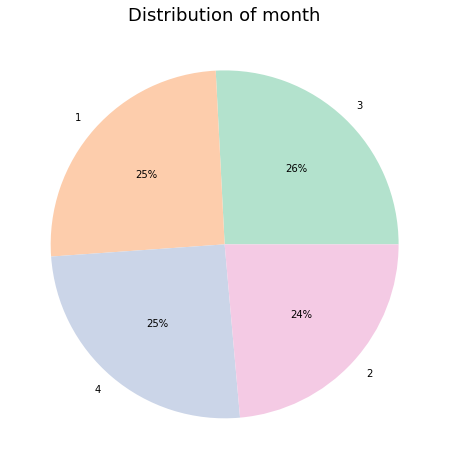

In [77]:
fig,ax = plt.subplots(figsize=(8,8))
colors = sns.color_palette('Pastel2')[0:5]
plt.pie(x=df_month['Count'], labels=df_month['Month'], colors=colors, autopct='%.0f%%', )
plt.title('Distribution of month', fontsize=18);
plt.show();

In [79]:
def plot_count_plot(data, feature, xlabel, ylabel, title):
    fig,ax = plt.subplots(figsize=(12,6))
    base_color = sns.color_palette()[0]
    sns.countplot(data=data, x=feature, color=base_color)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=18)
    plt.show();

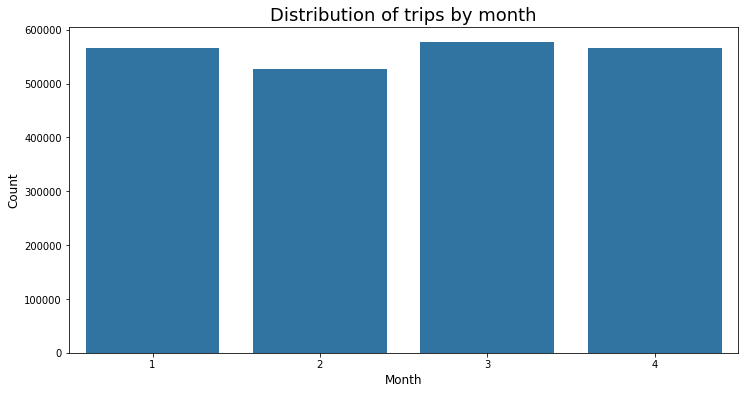

In [80]:
plot_count_plot(df_clean, 'Month', 'Month', 'Count', 'Distribution of trips by month')

> **Observation: 89% of the rides are by subscibers and 11% by customers**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration_sec was right skewed and log scale transformation made the distribution normal. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Start time and end time were of object types and had to be converted to datetime datatype. The generated features like weekday, hour of the day and day of the month provided valuable insights 

## Bivariate Exploration

## Multivariate Exploration

## Conclusions
>Based on univariate exploration following observations were made:
> * The data provided for analysis if the ride share data for February 2019
> * The frequency of rides were more for subscribers than customers. 89% of the rides are by subscibers and 11% by customers
> * Bike is shared for the whole trip only for 9% of the rides
> * Maximum number of rides happened on Thursdays and lowest on Saturday and Sunday compared to weekdays
> * Maximum number of rides were on 28th Feb and minimum on 9th Feb
> * Maximum number of rides were between 8-10AM and 5-7PM which are clearly peak hours
> * Market St at 10th St is where most rides originated
> * San Francisco Caltrain Station 2 had most rides in destination. Also, almost all stations in starting stations occurred on destination list too
> * 16th Street depot had the lowest rides for starting station and Willow St at Vine St has the lowest number of rides
> * 75% were male, 23% female and 2% Others based on gender data present

>Based on bivariate and multivariate data exploration the following observations were made:
> * Even though the frequency of duration by user type is higher for subscriber the average duration travelled by customers (~ 1400) is higher than the customers (~ 600).
> * Even though the frequency of rides is lesser during the weekends, we observe the rides were of longer duration  during weekends than during weekdays.
> * 17th February 2019 had the maximum duration of rides even though 28th Feb had the maximum frequency of rides
> * We can observe that peak hours doesn't contribute to the duration rather the highest duration happens at 3AM and next highest at 2AM.
> * Pattern of travel time observed during 2AM and 3AM where we expect rides to be longer during peak hours due to traffic

> Overall, the number of rides were more for subscribers who travelled more during weekdays and peak hours wheras the customers travelled more flexibly and more during weekends.

In [ ]:
df_clean.to_csv('df_clean.csv', index=None)
df_test = pd.read_csv('df_clean.csv')

# Test
df_test